This notebook is an adaptation of [2] and provides a starting point for training fully connected NNs.

It shows how to use a dataset from tensorflow and display images from the training and test sets.

Builds a fully connected network and shows results and after training



### Refs 

[1] https://www.tensorflow.org/install

[2] https://www.tensorflow.org/tutorials/keras/classification
    

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Auxiliary functions to show plots of training history and display images

In [2]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()


def show_images(rows, cols, data):

    width= 2 * rows
    height= 2 * cols

    f, axes= plt.subplots(rows,cols,figsize=(height,width))
    fig=plt.figure()

    for a in range(rows*cols):
        b = x_train[a]
        subplot_title=("class "+str(y_train[a]))
        axes.ravel()[a].set_title(subplot_title)  
        axes.ravel()[a].imshow(data[a, :, :], cmap=plt.cm.binary)
        axes.ravel()[a].axis('off')
    fig.tight_layout()    
    plt.show() 
    
    
    
def show_image(number):
    plt.figure()
    plt.imshow(x_train[number], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [3]:
class_names = np.array(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

def plot_predictions(predictions, ground_truth, num_rows= 5, num_cols=3 ):

    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], ground_truth, x_test)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], ground_truth)
    plt.tight_layout()
    plt.show()
    
    
def show_misclassified(predictions, ground_truth, num_rows= 5, num_cols=3):
    
    # Plot the first X test images with wrong predictions.
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    i = 0
    k = 0
    while i < num_images:
        predicted_label = np.argmax(predictions[k])
        if predicted_label != y_test[k]:
            plt.subplot(num_rows, 2*num_cols, 2*i+1)
            plot_image(k, predictions[k], ground_truth, x_test)
            plt.subplot(num_rows, 2*num_cols, 2*i+2)
            plot_value_array(k, predictions[k], ground_truth)
            i += 1
        k += 1
    plt.tight_layout()
    plt.show()
    

In [4]:
def show_keras_activation():
    print("The avaiable keras activations are:")
    for k, v in tf.keras.activations.__dict__.items():
        if not k[0].isupper() and not k[0] == "_":
            print("->", k)

## Loading Datasets from tensorflow collection of datasets


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


## Display images

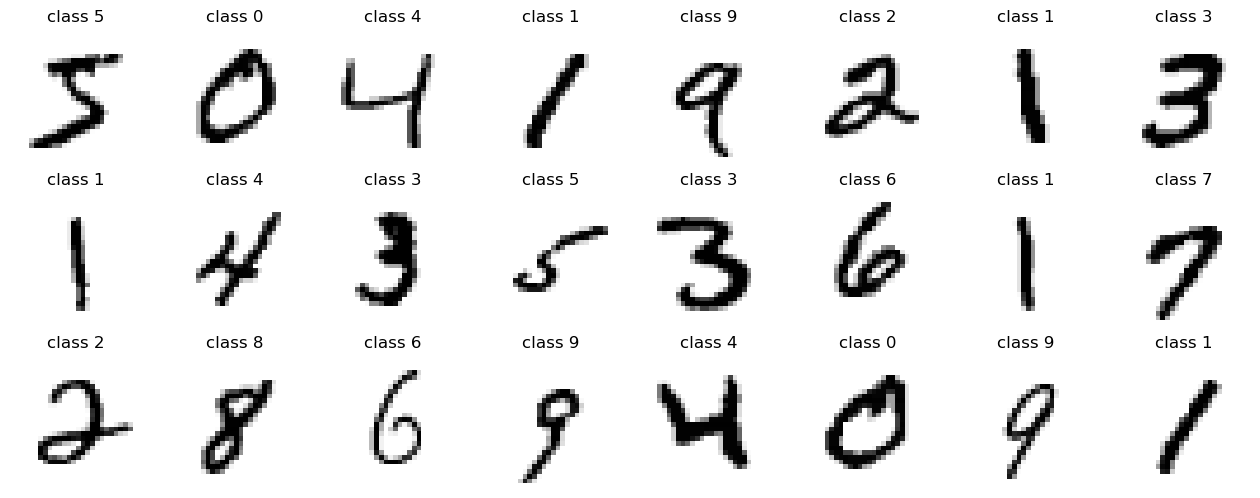

<Figure size 640x480 with 0 Axes>

In [6]:
show_images(3,8,x_train)

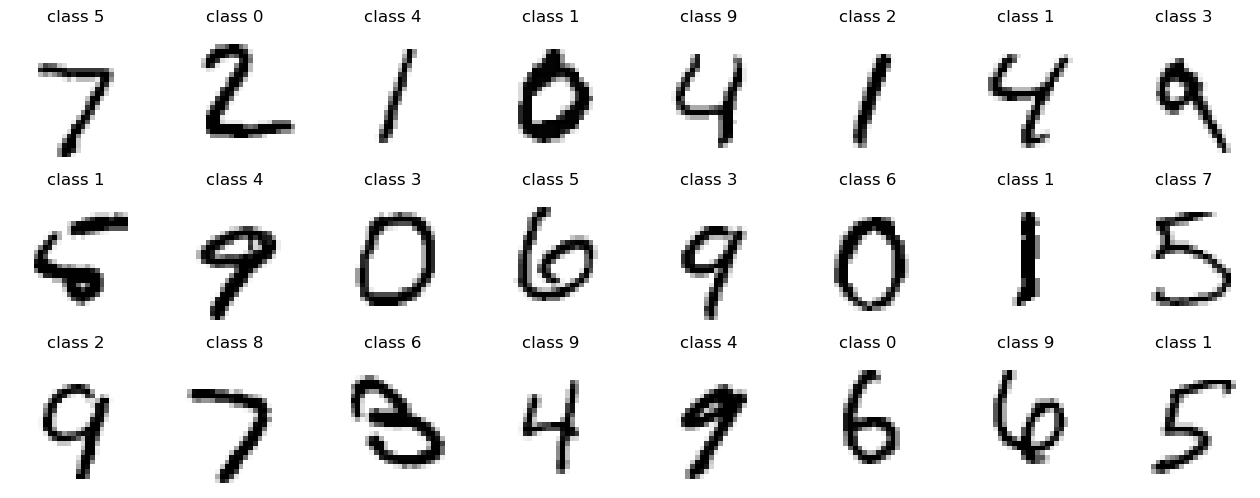

<Figure size 640x480 with 0 Axes>

In [7]:
show_images(3,8,x_test)

## Data distribution per class

As can be see from the result of the code beloy, the data is fairly distributes amongst the classes

In [8]:
from collections import Counter

dist_test, dist_train = Counter(y_test), Counter(y_train)

print("\nTest Class Distribution:")
print(" ", dist_test)
print("\n")
print("Train Class Distribution:")
print(" ", dist_train)


Test Class Distribution:
  Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})


Train Class Distribution:
  Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


## Normalize Input Data

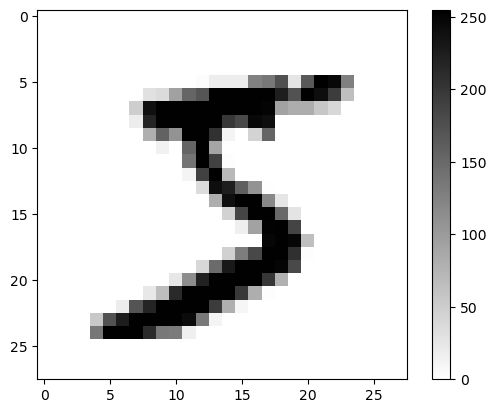

In [9]:
show_image(0)

In [10]:
x_train, x_test = x_train/255.0, x_test/255.0

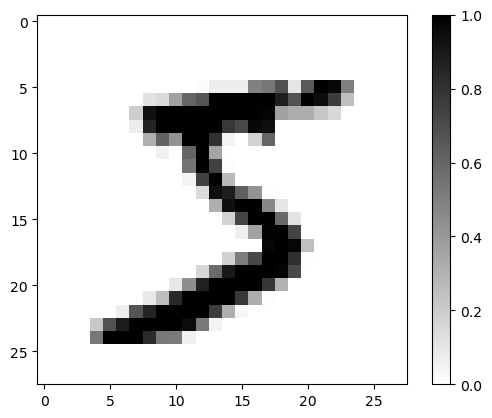

In [11]:
show_image(0)

## Create the model

Single hidden layer with 64 units.

In [12]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28), name='flatten_image'))
model.add(tf.keras.layers.Dense(64, activation='relu', name='hidden_layer'))
model.add(tf.keras.layers.Dense(10, activation='softmax', name='output'))

#### Note
The activation name **relu** corresponds to calling **tf.keras.activations.relu**

The string can be used as a shortcut. Tensorflow will call the function whose name matches the string

In [13]:
show_keras_activation()

The avaiable keras activations are:
-> deserialize
-> elu
-> exponential
-> get
-> hard_sigmoid
-> linear
-> relu
-> selu
-> serialize
-> sigmoid
-> softmax
-> softplus
-> softsign
-> swish
-> tanh


## Display model information

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_image (Flatten)      (None, 784)               0         
_________________________________________________________________
hidden_layer (Dense)         (None, 64)                50240     
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


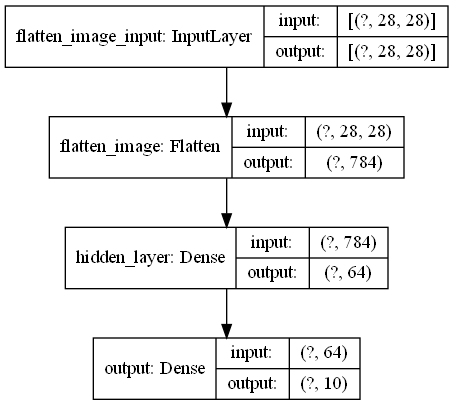

In [15]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## Generate predictions

In [16]:
predictions = model.predict(x_test)

print(predictions[0], y_test[0])

[0.08915114 0.07670404 0.08266799 0.08716737 0.09626406 0.07816649
 0.08661775 0.1651815  0.1432775  0.09480209] 7


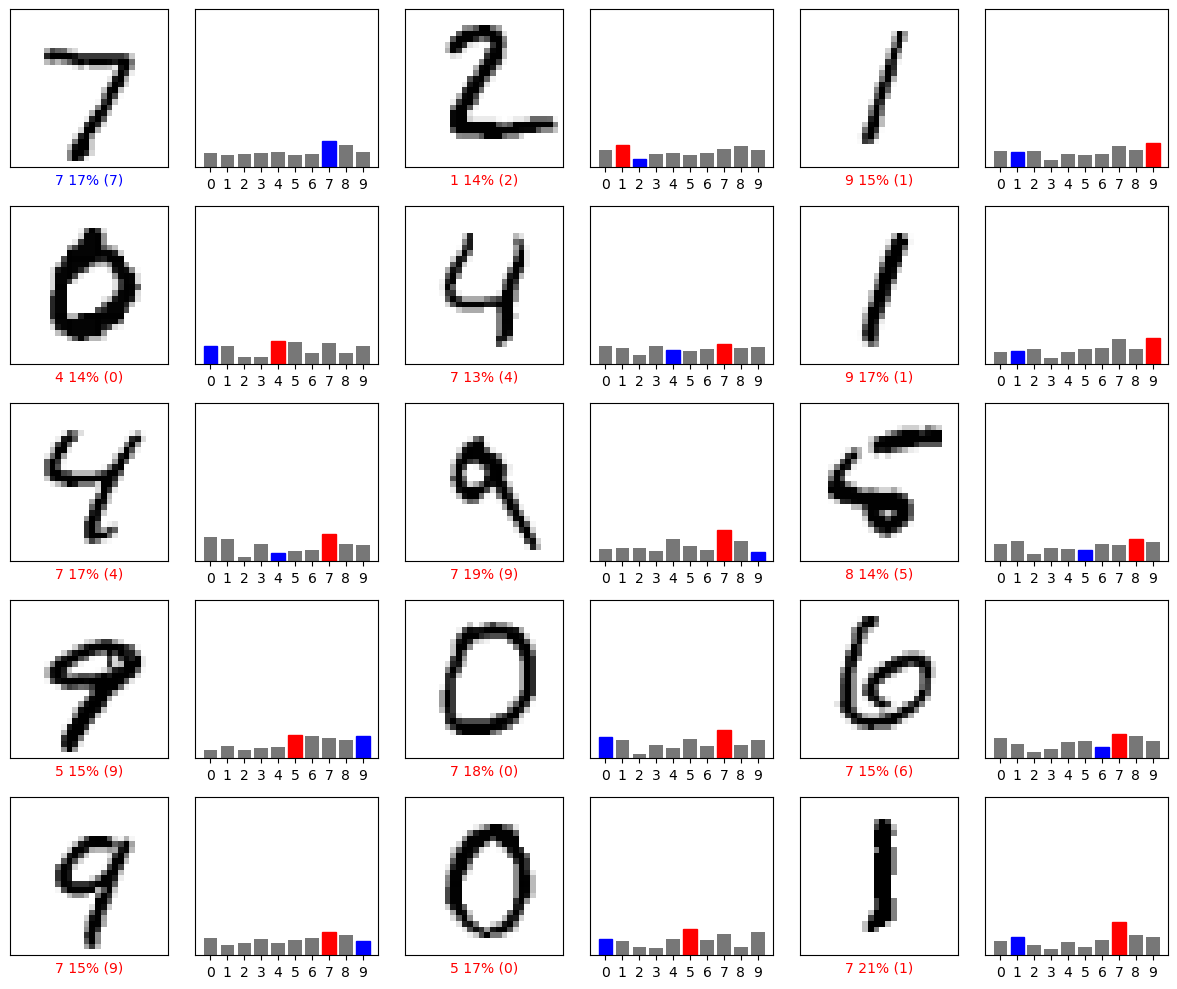

In [17]:
plot_predictions(predictions, y_test, 5,3)

## Training the model with a custom loop

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

train_dataset = train_dataset.shuffle(buffer_size=60000).batch(32)

@tf.function
def train_step(x,y):
    with tf.GradientTape() as tape:
        output = model(x)
        loss = loss_fn(y, output)
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return loss

def train(epochs):
    print('Training Results:')
    for epoch in range(epochs):
        epoch_loss = 0
        for (x_batch, y_batch) in train_dataset:
            epoch_loss += train_step(x_batch, y_batch)
        print(' Epoch: ', epoch, ' | Loss: ', epoch_loss.numpy())
    
train(5)

Training Results:
 Epoch:  0  | Loss:  572.5456
 Epoch:  1  | Loss:  271.9771
 Epoch:  2  | Loss:  195.10626
 Epoch:  3  | Loss:  153.6351
 Epoch:  4  | Loss:  124.9875


## Training using Tensorflow fit function

### Specify optimizer, loss and metrics

* **optimizer:** gradient descent optimization algorithm
* **loss:** loss function upon which derivatives are computed
* **metrics:** metrics to be computed during training and evaluation

In [19]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

eval = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0903 - accuracy: 0.9724


## Training

In [20]:
history = model.fit(x_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 1s 743us/step - loss: 0.0558 - accuracy: 0.9829
Epoch 2/15
1875/1875 [==============================] - 1s 618us/step - loss: 0.0471 - accuracy: 0.9852
Epoch 3/15
1875/1875 [==============================] - 1s 603us/step - loss: 0.0406 - accuracy: 0.9878
Epoch 4/15
1875/1875 [==============================] - 1s 732us/step - loss: 0.0349 - accuracy: 0.9892
Epoch 5/15
1875/1875 [==============================] - 2s 969us/step - loss: 0.0300 - accuracy: 0.9906
Epoch 6/15
1875/1875 [==============================] - 2s 955us/step - loss: 0.0265 - accuracy: 0.9921
Epoch 7/15
1875/1875 [==============================] - 2s 983us/step - loss: 0.0229 - accuracy: 0.9933
Epoch 8/15
1875/1875 [==============================] - 2s 968us/step - loss: 0.0204 - accuracy: 0.9939
Epoch 9/15
1875/1875 [==============================] - 2s 974us/step - loss: 0.0182 - accuracy: 0.9945
Epoch 10/15
1875/1875 [==============================] - 2s 973u

## History graphs for accuracy and loss

dict_keys(['loss', 'accuracy'])


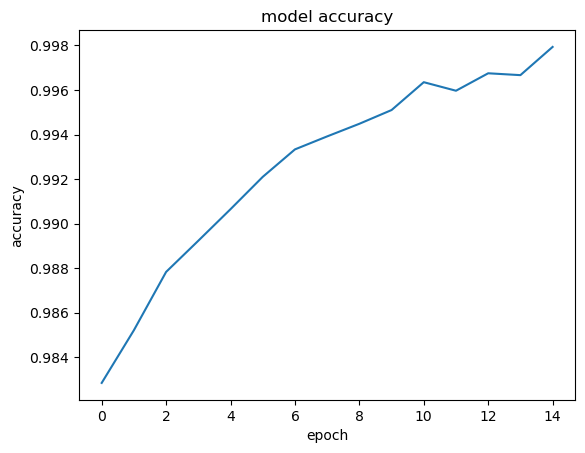

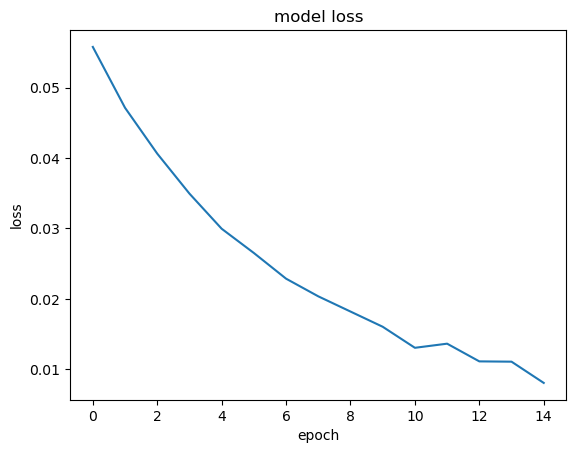

{'loss': [0.05575961992144585, 0.047120243310928345, 0.04061679542064667, 0.034940265119075775, 0.029956083744764328, 0.026513587683439255, 0.02286905236542225, 0.020362015813589096, 0.018203021958470345, 0.016044510528445244, 0.013057908974587917, 0.013643171638250351, 0.011130518279969692, 0.011088726110756397, 0.008073214441537857], 'accuracy': [0.9828500151634216, 0.9852166771888733, 0.9878333210945129, 0.9892333149909973, 0.9906499981880188, 0.9921000003814697, 0.9933333396911621, 0.9939166903495789, 0.9944833517074585, 0.9951000213623047, 0.9963499903678894, 0.9959666728973389, 0.996749997138977, 0.996666669845581, 0.9979333281517029]}


In [21]:
show_history(history)

print(history.history)

## Evaluate the model on the test set

In [22]:
eval1 = model.evaluate(x_test, y_test, verbose=2)

predictions = model.predict(x_test)

313/313 - 0s - loss: 0.1110 - accuracy: 0.9762


## Some prediction samples

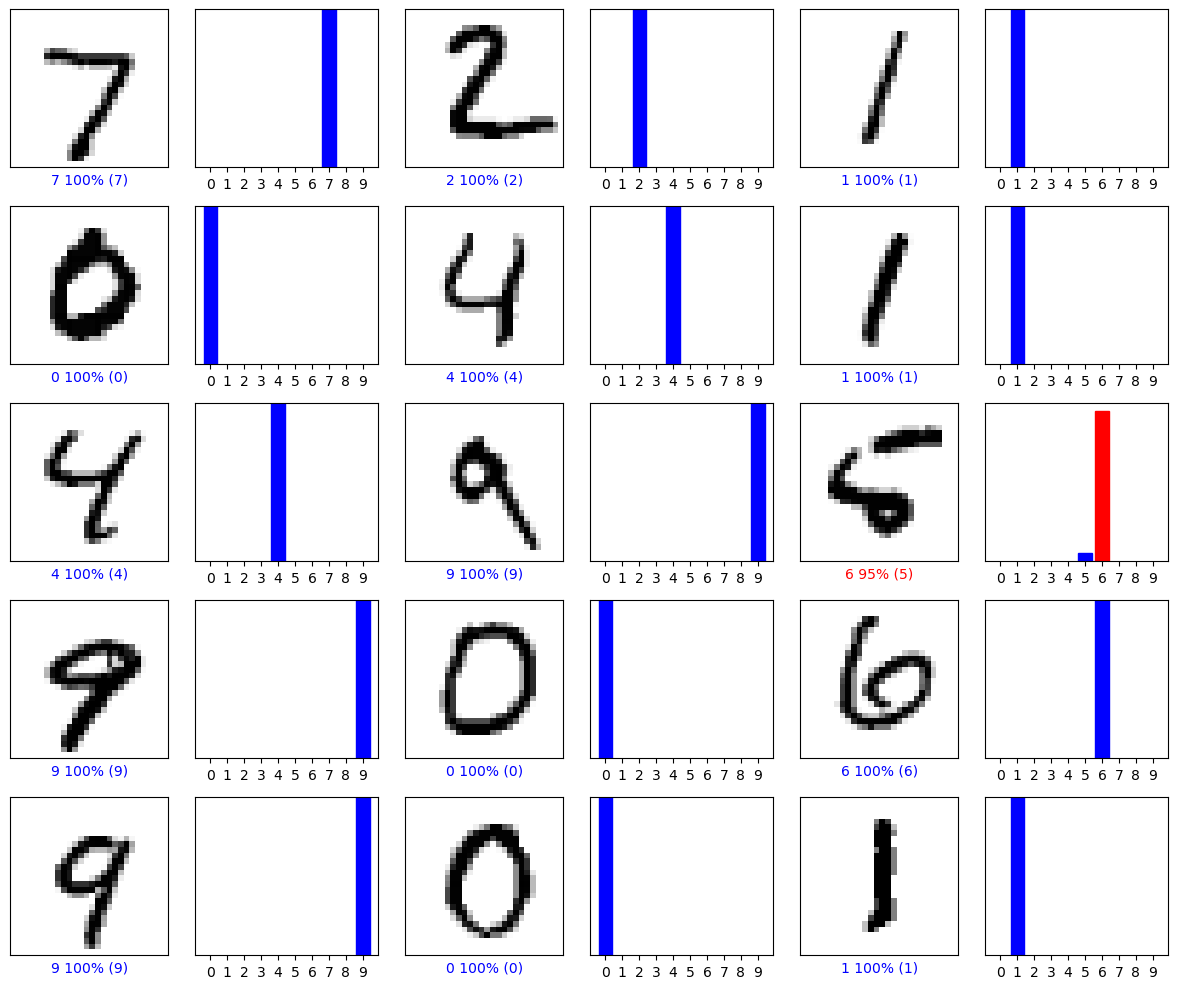

In [23]:
plot_predictions(predictions, y_test, 5, 3)

## Some misclassified samples

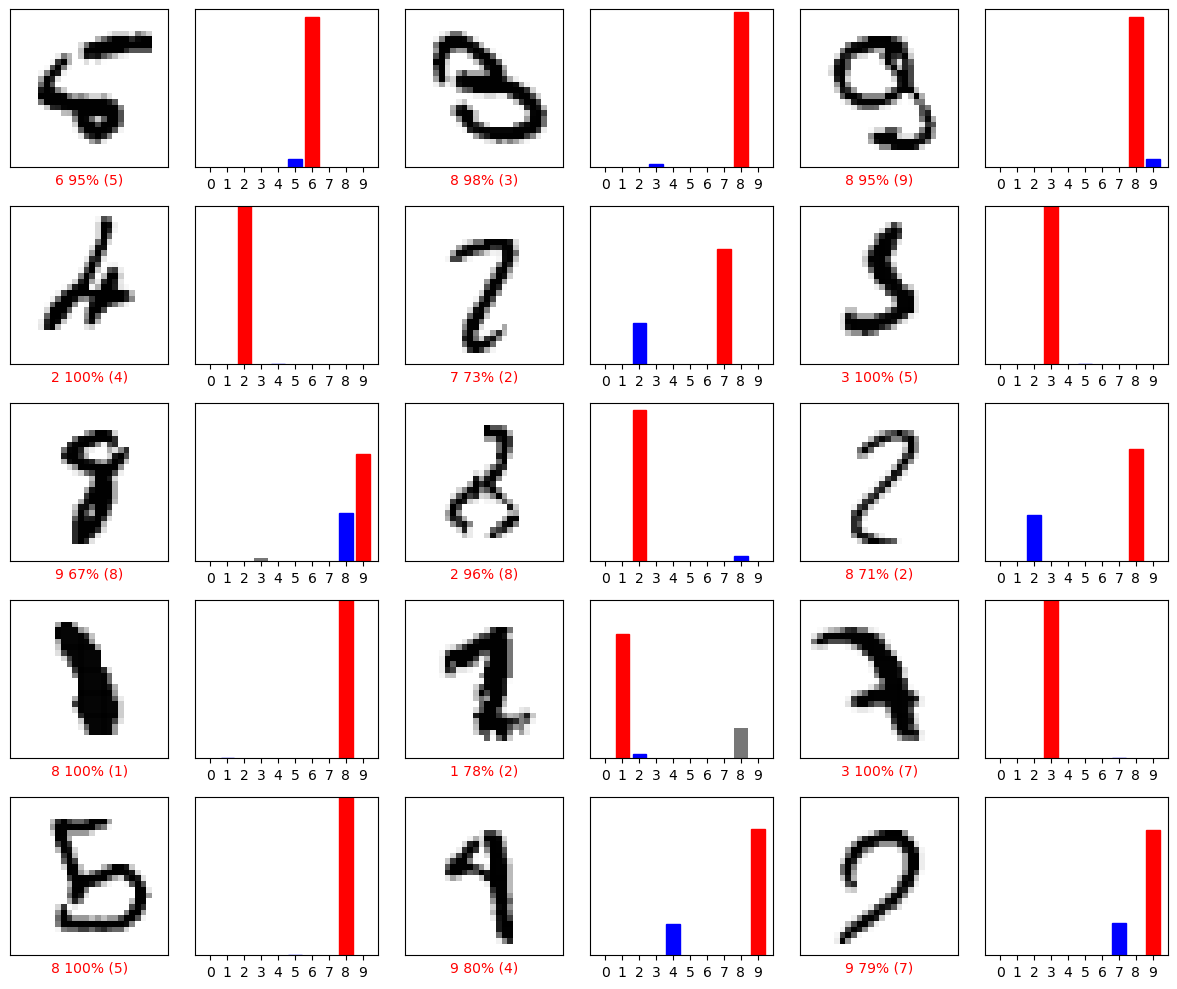

In [24]:
show_misclassified(predictions, y_test, 5, 3)

In [25]:
preds_sparse = [np.argmax(x) for x in predictions]

## Confusion Matrix

rows are lables, columns are predicitons.

In [26]:
conf_matrix = tf.math.confusion_matrix(y_test, preds_sparse)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    1,    0,    0,    0,    4,    1,    2,    1],
       [   0, 1120,    3,    1,    0,    0,    2,    0,    9,    0],
       [   5,    6,  998,    3,    1,    0,    3,    5,   11,    0],
       [   0,    0,    5,  987,    0,    3,    0,    3,    4,    8],
       [   1,    0,    3,    0,  962,    0,    4,    1,    3,    8],
       [   1,    1,    0,   12,    2,  861,    7,    0,    8,    0],
       [   0,    2,    3,    1,    1,    3,  942,    0,    6,    0],
       [   1,    6,   10,    6,    4,    0,    0,  991,    4,    6],
       [   4,    0,    3,    6,    1,    0,    2,    3,  950,    5],
       [   2,    3,    1,    4,   10,    3,    1,    3,    1,  981]])>

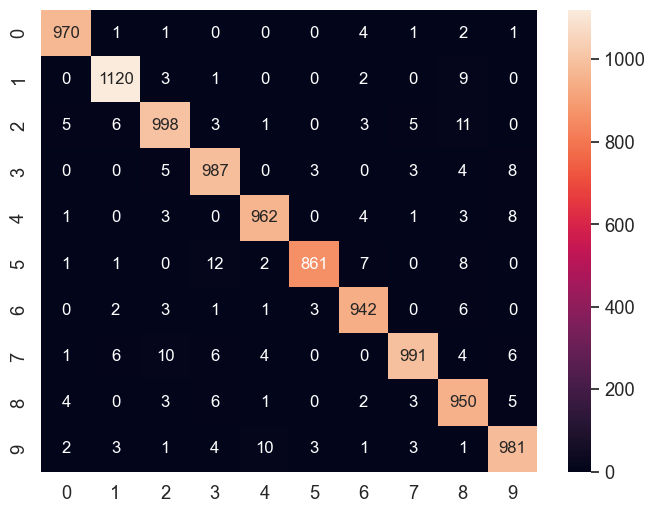

In [27]:
import seaborn as sn 
import pandas as pd 

df_cm = pd.DataFrame(conf_matrix.numpy(), range(10), range(10))

plt.figure(figsize=(8,6))

sn.set(font_scale=1.2) # lable size
sn.heatmap(df_cm, annot=True, annot_kws={"size":12}, fmt='d') # font size

plt.show()